<a href="https://colab.research.google.com/github/bacoco/LLM_train/blob/main/%E2%9A%A1%EF%B8%8F_FastEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title # ⚡️ FastEval

# @markdown Evaluate your LLM on `ARC`, `TruthfulQA`, `GSM8K`, `Winogrande`, `HellaSwag`, `MMLU`, and `AlpacaEval`

# @markdown within `30` minutes with only `2%` avg estimation error rate on `free T4 Colab GPU`.

# @markdown Evaluation scores will be saved in `scores` directory.

# @markdown 🔮 Created by [@zainulabideen](https://huggingface.co/abideen)

# @markdown Based on [tinyBenchmarks](https://arxiv.org/pdf/2402.14992.pdf) paper



# @markdown ---

# @markdown ### ✨ Evaluation Parameters

!git clone https://github.com/EleutherAI/lm-evaluation-harness
%cd lm-evaluation-harness
!pip install -e .
import os
import requests
from zipfile import ZipFile


MODEL = "abideen/AlphaMonarch-laser" # @param {type:"string"}
# ALL_TASKS = True # @param {type:"boolean"}
ARC = False # @param {type:"boolean"}
TRUTHFULQA = False # @param {type:"boolean"}
GSM8K = True # @param {type:"boolean"}
WINOGRANDE = True # @param {type:"boolean"}
HELLASWAG = True # @param {type:"boolean"}
MMLU = True # @param {type:"boolean"}
# ALPACAEVAL = False # @param {type:"boolean"}

tasks = []
# if ALL_TASKS:
#   tasks.append("arc","truthfulqa","gsm8k","winogrande","hellaswag","mmlu")
def config_update(file_path, before, after):
  with open(file_path, 'r') as file:
        file_content = file.read()
  new_content = file_content.replace(f'dataset_path: {before}', f'dataset_path: {after}')
  with open(file_path, 'w') as file:
        file.write(new_content)

def download_and_unzip(url, destination_folder):
    os.makedirs(destination_folder, exist_ok=True)
    response = requests.get(url)
    zip_file_path = os.path.join(destination_folder, 'task_config.zip')
    with open(zip_file_path, 'wb') as zip_file:
        zip_file.write(response.content)
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    os.remove(zip_file_path)

output="/content/scores"

if ARC:
  tasks.append("arc")
  file_path = f'lm_eval/tasks/arc/arc_easy.yaml'
  config_update(file_path, "allenai/ai2_arc", "tinyBenchmarks/tinyAI2_arc")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=arc_challenge --batch_size=1 --num_fewshot 5 --output_path="/content/scores/arc.json" --log_samples
if TRUTHFULQA:
  tasks.append("truthfulqa")
  file_path = f'lm_eval/tasks/truthfulqa/truthfulqa_mc1.yaml'
  config_update(file_path, "truthful_qa", "tinyBenchmarks/tinyTruthfulQA")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=truthfulqa --batch_size=1 --num_fewshot 5 --output_path="/content/scores/truthfulqa.json" --log_samples
if GSM8K:
  tasks.append("gsm8k")
  file_path = f'lm_eval/tasks/gsm8k/gsm8k.yaml'
  config_update(file_path, "gsm8k", "tinyBenchmarks/tinyGSM8K")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=gsm8k --batch_size=1 --num_fewshot 5 --output_path="/content/scores/gsm8k.json" --log_samples
if WINOGRANDE:
  tasks.append("winogrande")
  file_path = f'lm_eval/tasks/winogrande/default.yaml'
  config_update(file_path, "winogrande", "tinyBenchmarks/tinywinogrande")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=winogrande --batch_size=1 --num_fewshot 5 --output_path="/content/scores/winogrande.json" --log_samples
if HELLASWAG:
  tasks.append("hellaswag")
  file_path = f'lm_eval/tasks/hellaswag/hellaswag.yaml'
  config_update(file_path, "hellaswag", "tinyBenchmarks/tinyhellaswag")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=hellaswag --batch_size=1 --num_fewshot 5 --output_path="/content/scores/hellaswag.json" --log_samples
if MMLU:
  tasks.append("mmlu")
  download_and_unzip("https://drive.google.com/uc?export=download&id=1IMeCFfcWyYVEzJ2hoMZn0cPftWcxYd82", "lm_eval/tasks/")
  # config_update(file_path, "allenai/ai2_arc", "tinyBenchmarks/tinyAI2_arc")
  !lm_eval --model hf --model_args pretrained={MODEL} --tasks=tinyMMLU --batch_size=1 --num_fewshot 5 --output_path="/content/scores/mmlu.json" --log_samples

print("All Evaluations completed! Check the scores folder.")

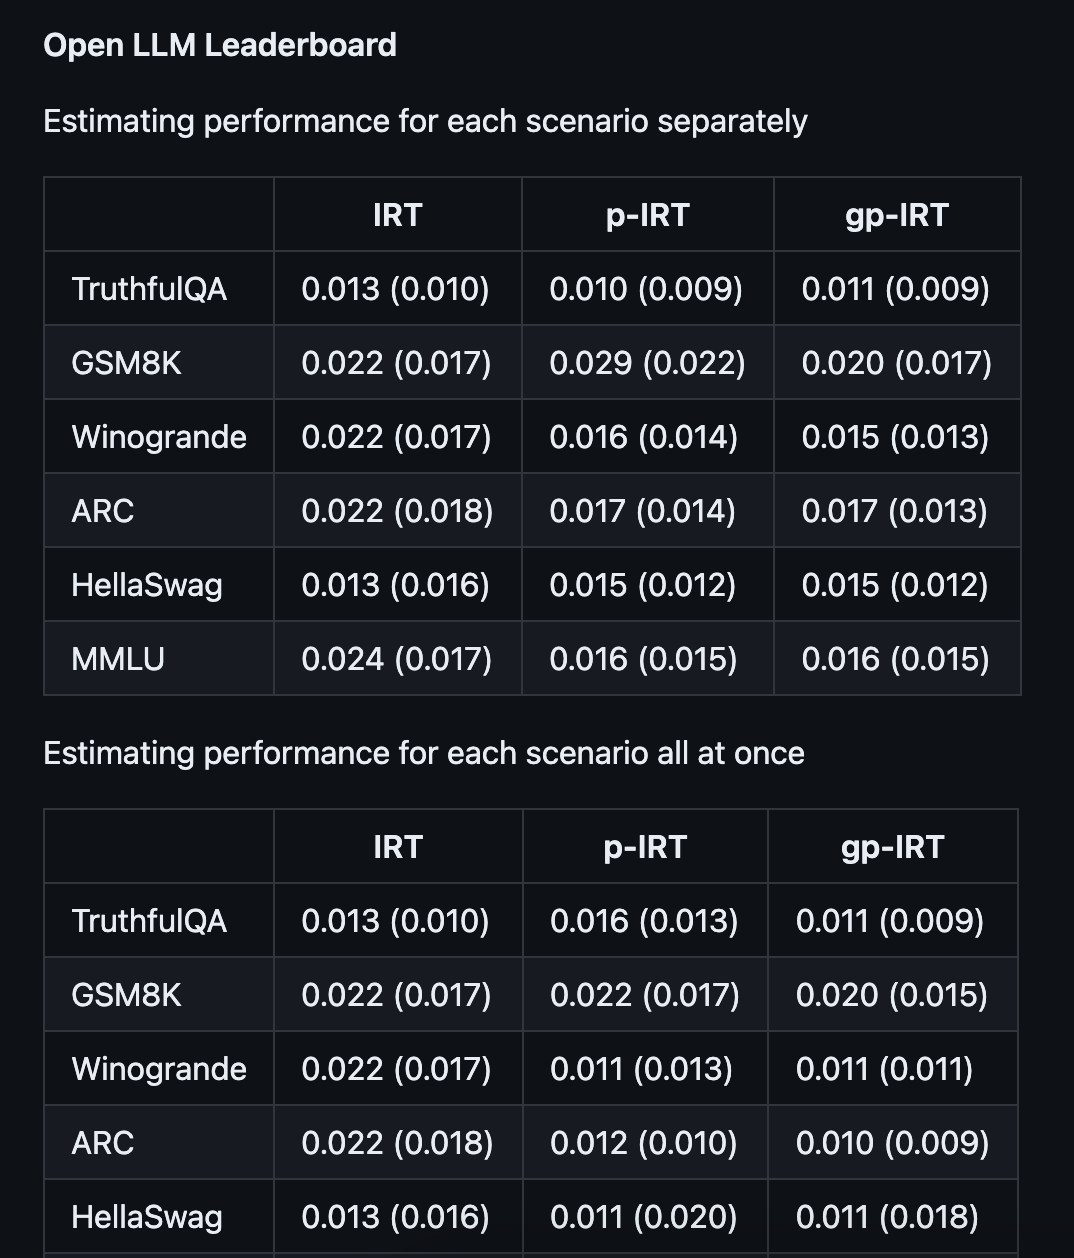